In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

In [26]:
# Load data with a different encoding
movie_data = pd.read_csv('IMDb Movies India.csv', encoding='latin1')  

In [4]:
movie_data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


### Exploratory Data Analysis (EDA)

In [6]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [8]:
movie_data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

- Rating specifically quantifies the perceived quality or enjoyment.
- Votes represent the level of engagement or popularity among viewers.
- We notice that the dataset contains a lot of Nan values.

Number of films each year.

In [11]:
import pandas as pd

# Assuming 'films_per_year' is the Series containing the count of films per year

# Remove parentheses from the index (years)
films_per_year.index = films_per_year.index.str.strip('()')

# Convert the index to integers
films_per_year.index = films_per_year.index.astype(int)

# Define the intervals for grouping the years
intervals = pd.interval_range(start=1910, end=2023, freq=10)

# Use pd.cut to bin the years into intervals
film_counts_intervals = pd.cut(films_per_year.index, bins=intervals)

# Group the data by the intervals and sum the number of films in each interval
films_per_interval = films_per_year.groupby(film_counts_intervals).sum()

print(films_per_interval)


(1910, 1920]       4
(1920, 1930]      10
(1930, 1940]     817
(1940, 1950]     996
(1950, 1960]    1145
(1960, 1970]    1022
(1970, 1980]    1391
(1980, 1990]    1930
(1990, 2000]    1925
(2000, 2010]    2332
(2010, 2020]    2979
Name: count, dtype: int64


C:\Users\leila\AppData\Local\Temp\ipykernel_7900\3913948377.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  films_per_interval = films_per_year.groupby(film_counts_intervals).sum()


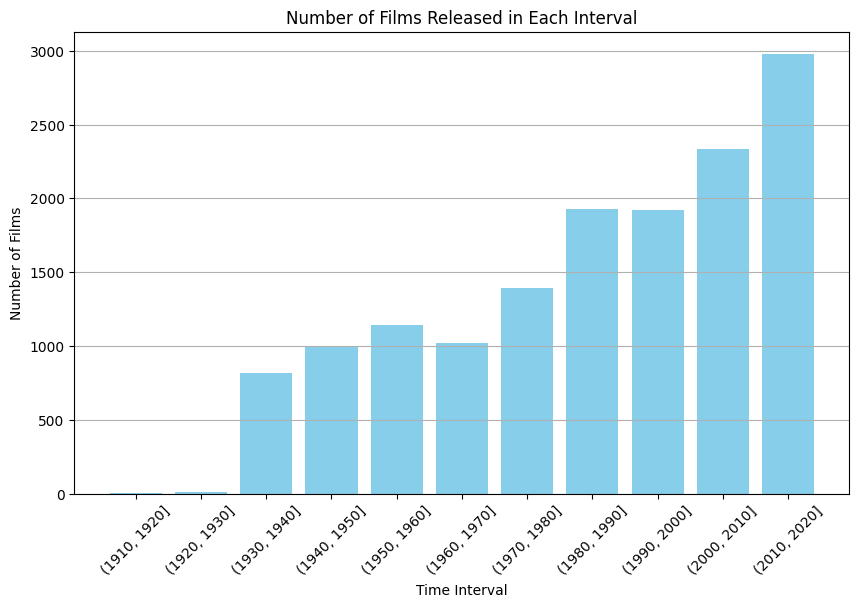

In [12]:
import matplotlib.pyplot as plt

# Plot the number of films for each time interval using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(films_per_interval.index.astype(str), films_per_interval.values, color='skyblue')
plt.title('Number of Films Released in Each Interval')
plt.xlabel('Time Interval')
plt.ylabel('Number of Films')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


We note that the large number is in the period (2010-2020)

Let's see the different categories of films

In [15]:
films_per_genre = movie_data.groupby('Genre').size().sort_values(ascending=False)
print(films_per_genre)

Genre
Drama                        2780
Action                       1289
Thriller                      779
Romance                       708
Drama, Romance                524
                             ... 
Drama, Fantasy, War             1
Action, Family, Thriller        1
Animation, Comedy, Family       1
Drama, History, Mystery         1
Adventure, Comedy, Family       1
Length: 485, dtype: int64


Let's determine the unique Film's Categories

In [17]:
# Split genres separated by commas and strip leading/trailing whitespace
genres_split = movie_data['Genre'].str.split(',').apply(lambda x: [genre.strip() for genre in x] if isinstance(x, list) else [])

# Create a set to collect unique genres
unique_genres = set()

# Iterate over each row of the split genres and add to the set
for genres_list in genres_split:
    unique_genres.update(genres_list)

# Convert the set of unique genres back to a list
unique_genres_list = list(unique_genres)

print(unique_genres_list)


['Mystery', 'Crime', 'Animation', 'War', 'Short', 'Biography', 'History', 'Thriller', 'News', 'Documentary', 'Sci-Fi', 'Musical', 'Music', 'Adventure', 'Horror', 'Western', 'Fantasy', 'Action', 'Romance', 'Reality-TV', 'Comedy', 'Sport', 'Drama', 'Family']


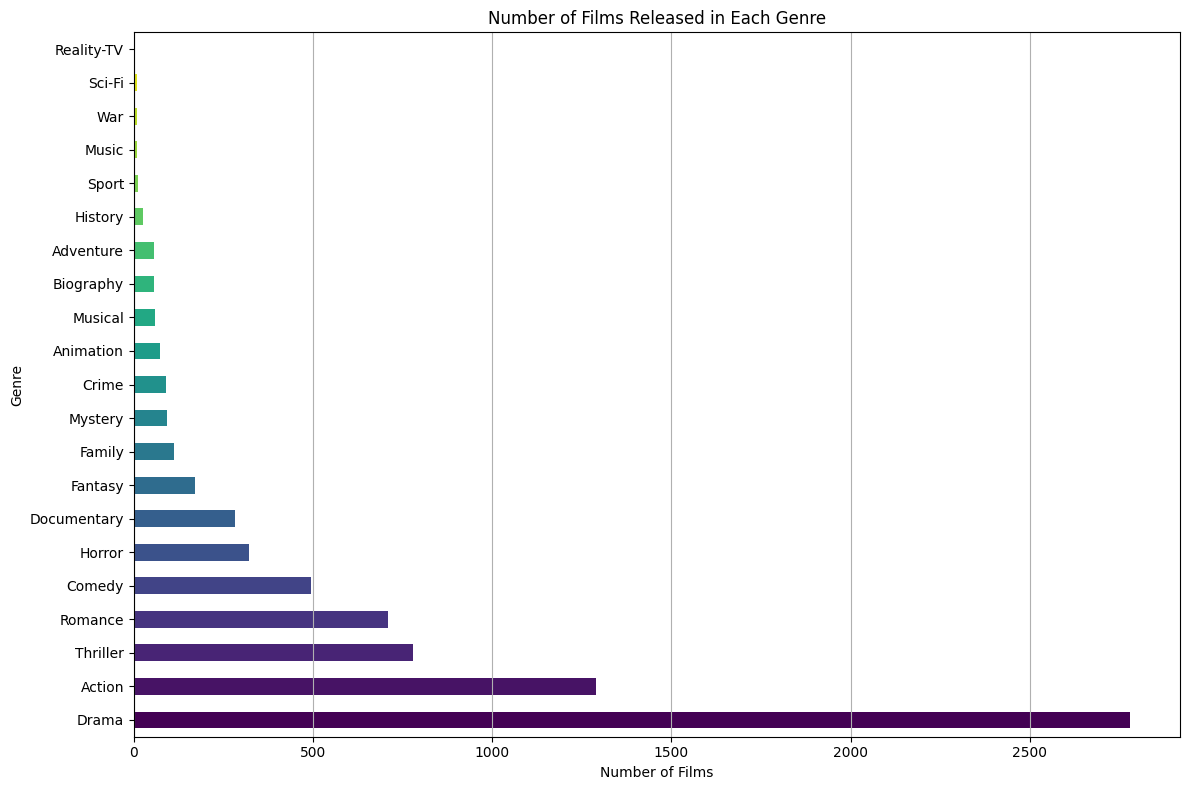

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the number of films for each unique genre using a horizontal bar plot with a color gradient
plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(films_per_unique_genre)))  # Choose a colormap (e.g., viridis)
films_per_unique_genre.plot(kind='barh', color=colors)
plt.title('Number of Films Released in Each Genre')
plt.xlabel('Number of Films')
plt.ylabel('Genre')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


We see that the most popular category is Drama


Let's define the highest rated film


In [22]:
# Assuming 'movie_data' is your DataFrame containing the movie dataset

# Calculate the top 10% threshold for ratings
top_threshold = movie_data['Rating'].quantile(0.9)

# Filter the DataFrame to include only films with ratings above the top 10% threshold
highest_rated_films = movie_data[movie_data['Rating'] >= top_threshold]

# Sort the highest-rated films by rating in descending order
highest_rated_films = highest_rated_films.sort_values(by='Rating', ascending=False)

print(highest_rated_films[['Name', 'Rating']].head(10))


                      Name  Rating
8339       Love Qubool Hai    10.0
5410            Half Songs     9.7
2563                 Breed     9.6
11704             Ram-Path     9.4
14222  The Reluctant Crime     9.4
6852                  June     9.4
5077          Gho Gho Rani     9.4
12673   Secrets of Sinauli     9.3
13231           Sindhustan     9.3
5125           God of gods     9.3


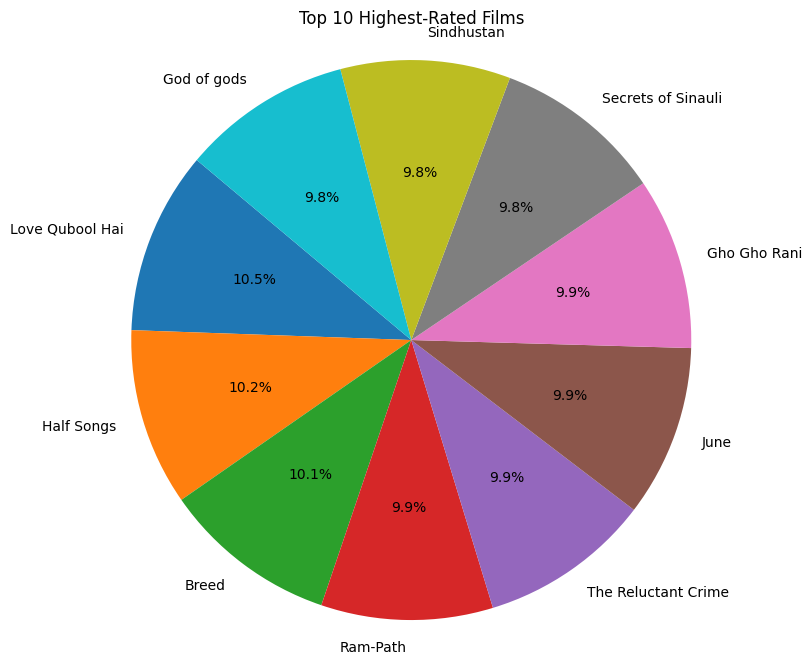

In [26]:
import matplotlib.pyplot as plt

# Assuming 'highest_rated_films' is the DataFrame containing the highest-rated films

# Get the top 10 highest-rated films
top_10_highest_rated_films = highest_rated_films.head(10)

# Plot the top 10 highest-rated films using a pie chart
plt.figure(figsize=(10, 8))
plt.pie(top_10_highest_rated_films['Rating'], labels=top_10_highest_rated_films['Name'], autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Highest-Rated Films')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:
# Convert the 'Votes' column to numerical data type
movie_data['Votes'] = pd.to_numeric(movie_data['Votes'], errors='coerce')

# Calculate the top 10% threshold for votes
top_votes_threshold = movie_data['Votes'].quantile(0.9)

# Filter the DataFrame to include only films with votes above the top 10% threshold
highest_voted_films = movie_data[movie_data['Votes'] >= top_votes_threshold]

# Sort the highest-voted films by number of votes in descending order
highest_voted_films = highest_voted_films.sort_values(by='Votes', ascending=False)

# Get the top 10 highest-voted films
top_10_highest_voted_films = highest_voted_films.head(10)

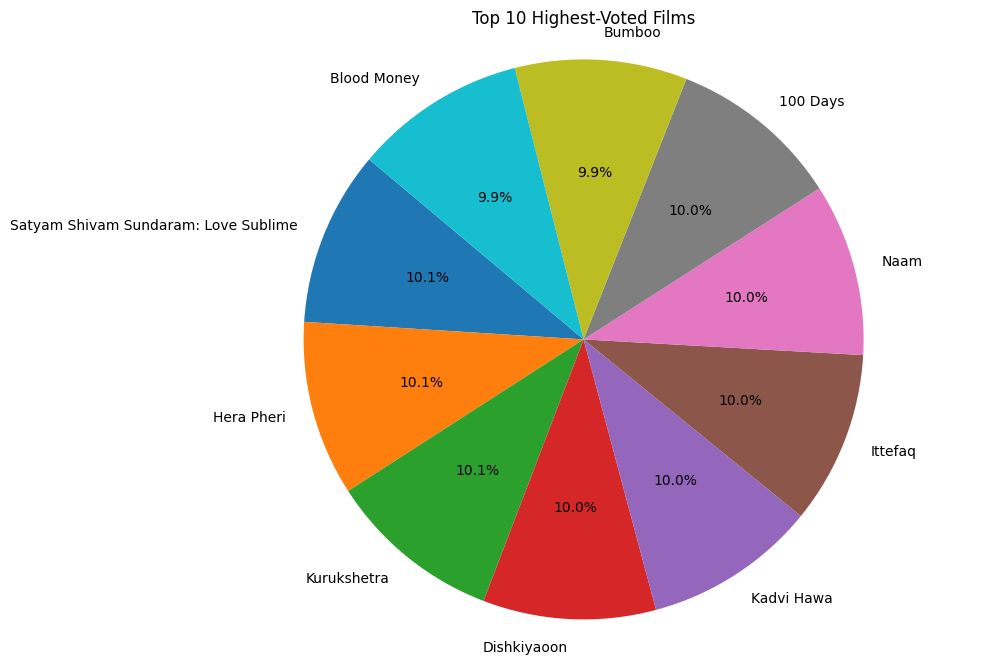

In [30]:
# Plot the top 10 highest-voted films using a pie chart
plt.figure(figsize=(10, 8))
plt.pie(top_10_highest_voted_films['Votes'], labels=top_10_highest_voted_films['Name'], autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Highest-Voted Films')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


From these visualisations, we can understand that the films with the highest ratings are not necessarily the most voted on.

In [148]:
import pandas as pd

# Assuming 'movie_data' is your DataFrame containing the movie dataset

# Convert 'Votes' column to numeric type
movie_data['Votes'] = pd.to_numeric(movie_data['Votes'], errors='coerce')

# For actors
actor_votes = movie_data.groupby('Actor 1')['Votes'].sum()
actor_votes = actor_votes.add(movie_data.groupby('Actor 2')['Votes'].sum(), fill_value=0)
actor_votes = actor_votes.add(movie_data.groupby('Actor 3')['Votes'].sum(), fill_value=0)

# For directors
director_votes = movie_data.groupby('Director')['Votes'].sum()

# Combine actor and director votes
total_votes = actor_votes.add(director_votes, fill_value=0)

# Get the top 10 most rated actors and directors
top_10_actors = total_votes.nlargest(50)
top_10_directors = director_votes.nlargest(50)

print("Top 10 Most Rated Actors:")
print(top_10_actors)
print("\nTop 10 Most Rated Directors:")
print(top_10_directors)


Top 10 Most Rated Actors:
Amitabh Bachchan      22368.0
Sanjay Dutt           21841.0
Dharmendra            21404.0
Naseeruddin Shah      20037.0
Govinda               18963.0
Sunny Deol            18440.0
Akshay Kumar          18166.0
Anil Kapoor           15547.0
Jackie Shroff         15466.0
Rishi Kapoor          14519.0
Shabana Azmi          14489.0
Juhi Chawla           14221.0
Rajesh Khanna         13886.0
Karisma Kapoor        13497.0
Anupam Kher           13405.0
Mithun Chakraborty    13332.0
Raveena Tandon        13239.0
Vinod Khanna          13032.0
Sunil Shetty          12819.0
Shashi Kapoor         12794.0
Dev Anand             12763.0
Ashok Kumar           12553.0
Hema Malini           12326.0
Ajay Devgn            11932.0
Zeenat Aman           11565.0
Madhuri Dixit         11371.0
Jeetendra             11105.0
Shammi Kapoor         10882.0
Rekha                 10709.0
Raj Kapoor            10488.0
Sanjeev Kumar          9953.0
Mahesh Bhatt           9888.0
Manoj Kumar   

In [20]:
# the most voted films

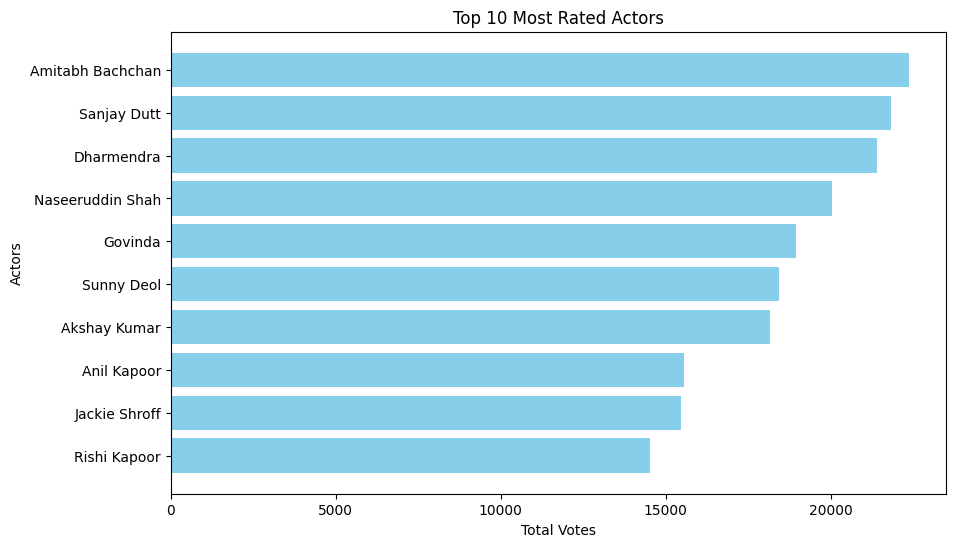

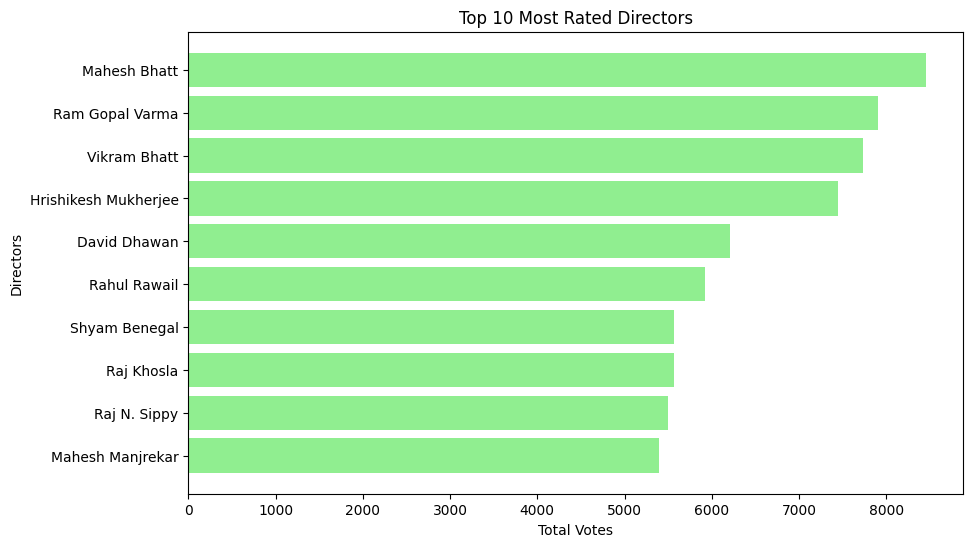

In [22]:
# Data for the top 10 most rated actors and directors
actors_data = {
    'Amitabh Bachchan': 22368.0,
    'Sanjay Dutt': 21841.0,
    'Dharmendra': 21404.0,
    'Naseeruddin Shah': 20037.0,
    'Govinda': 18963.0,
    'Sunny Deol': 18440.0,
    'Akshay Kumar': 18166.0,
    'Anil Kapoor': 15547.0,
    'Jackie Shroff': 15466.0,
    'Rishi Kapoor': 14519.0
}

directors_data = {
    'Mahesh Bhatt': 8460.0,
    'Ram Gopal Varma': 7910.0,
    'Vikram Bhatt': 7733.0,
    'Hrishikesh Mukherjee': 7446.0,
    'David Dhawan': 6209.0,
    'Rahul Rawail': 5917.0,
    'Shyam Benegal': 5568.0,
    'Raj Khosla': 5564.0,
    'Raj N. Sippy': 5504.0,
    'Mahesh Manjrekar': 5397.0
}

# Plotting the data for top 10 most rated actors
plt.figure(figsize=(10, 6))
plt.barh(list(actors_data.keys()), list(actors_data.values()), color='skyblue')
plt.xlabel('Total Votes')
plt.ylabel('Actors')
plt.title('Top 10 Most Rated Actors')
plt.gca().invert_yaxis()  # Invert y-axis to show the actor with the highest votes on top
plt.show()

# Plotting the data for top 10 most rated directors
plt.figure(figsize=(10, 6))
plt.barh(list(directors_data.keys()), list(directors_data.values()), color='lightgreen')
plt.xlabel('Total Votes')
plt.ylabel('Directors')
plt.title('Top 10 Most Rated Directors')
plt.gca().invert_yaxis()  # Invert y-axis to show the director with the highest votes on top
plt.show()


In [3]:
# The most rated actors and directors

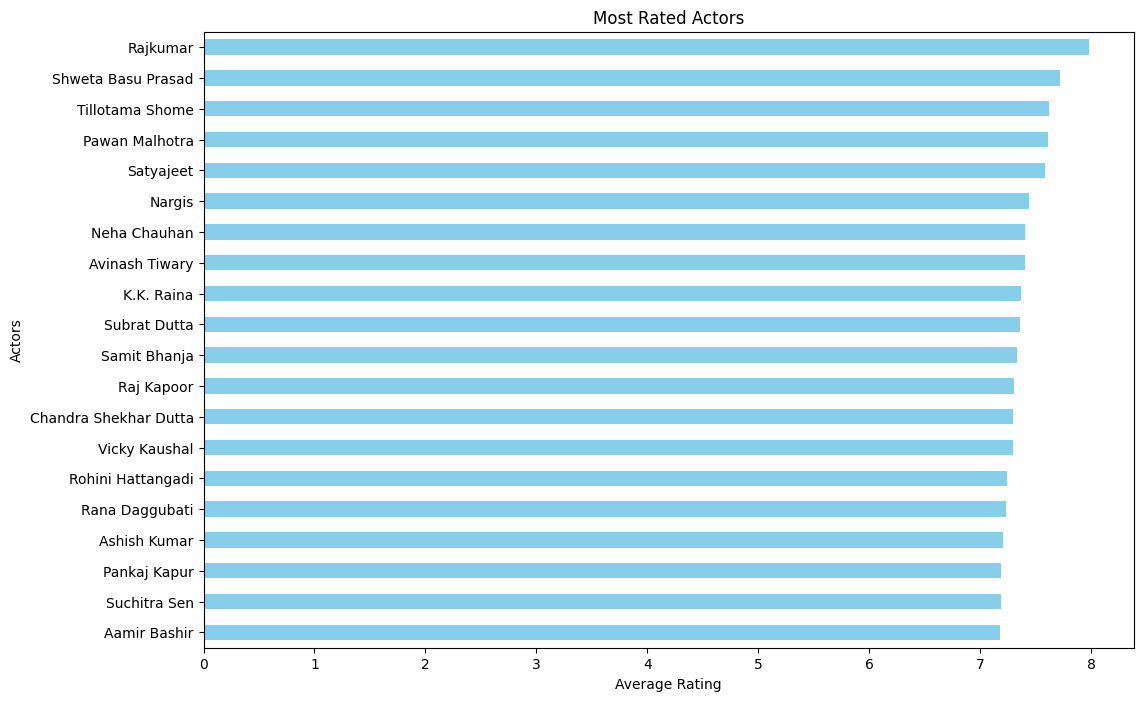

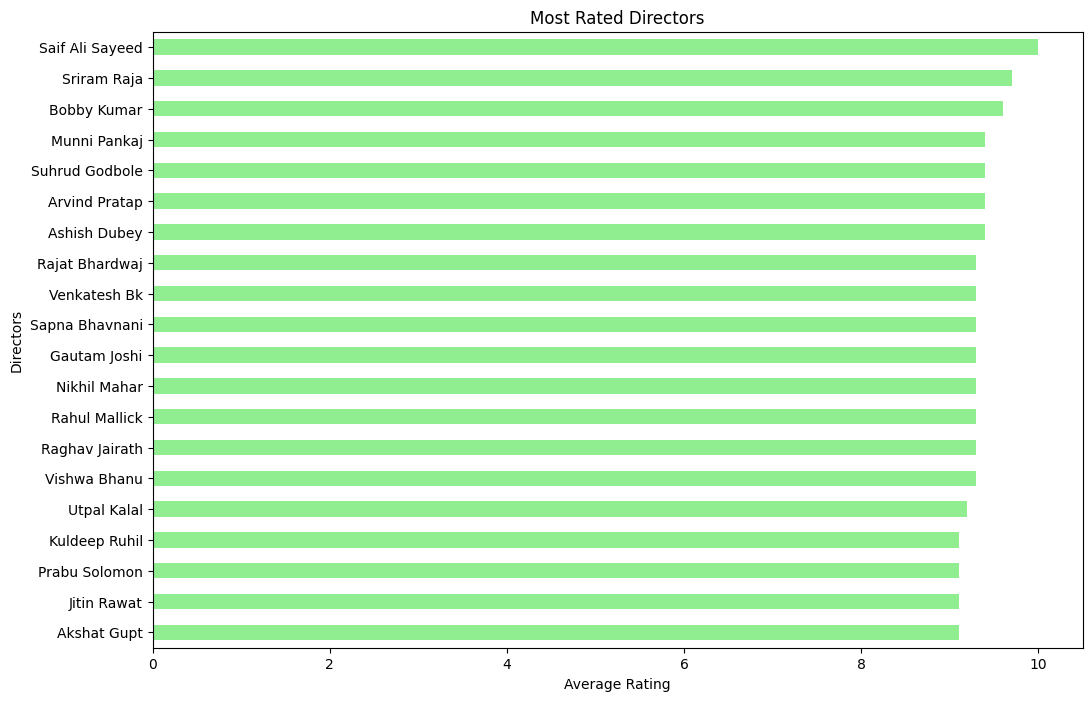

In [23]:
# Compute average ratings for actors
actor_ratings = movie_data.groupby(['Actor 1'])['Rating'].mean().fillna(0)
actor_ratings = actor_ratings.add(movie_data.groupby(['Actor 2'])['Rating'].mean().fillna(0), fill_value=0)
actor_ratings = actor_ratings.add(movie_data.groupby(['Actor 3'])['Rating'].mean().fillna(0), fill_value=0)
actor_ratings = actor_ratings / 3  # Divide by 3 to get the average rating

# Compute average ratings for directors
director_ratings = movie_data.groupby('Director')['Rating'].mean().fillna(0)

# Plotting the data for most rated actors
plt.figure(figsize=(12, 8))
actor_ratings.sort_values(ascending=False).head(20).plot(kind='barh', color='skyblue')
plt.xlabel('Average Rating')
plt.ylabel('Actors')
plt.title('Most Rated Actors')
plt.gca().invert_yaxis()  # Invert y-axis to show the actor with the highest ratings on top
plt.show()

# Plotting the data for most rated directors
plt.figure(figsize=(12, 8))
director_ratings.sort_values(ascending=False).head(20).plot(kind='barh', color='lightgreen')
plt.xlabel('Average Rating')
plt.ylabel('Directors')
plt.title('Most Rated Directors')
plt.gca().invert_yaxis()  # Invert y-axis to show the director with the highest ratings on top
plt.show()


In [15]:
# Unique number of actors
unique_actors = movie_data[['Actor 1', 'Actor 2', 'Actor 3']].stack().nunique()

# Unique number of directors
unique_directors = movie_data['Director'].nunique()

print("Unique number of actors:", unique_actors)
print("Unique number of directors:", unique_directors)


Unique number of actors: 10288
Unique number of directors: 5938


In [24]:
import pandas as pd

# Assuming 'movie_data' is your DataFrame containing the movie dataset

# Convert 'Duration' column to numeric format (extracting minutes)
movie_data['Duration'] = movie_data['Duration'].str.extract(r'(\d+)').astype(float)

# Calculate the average duration
average_duration = movie_data['Duration'].mean()

print("Average duration of all films:", average_duration, "minutes")


Average duration of all films: 128.12651933701656 minutes


Let's determine the most Rated Film Categories

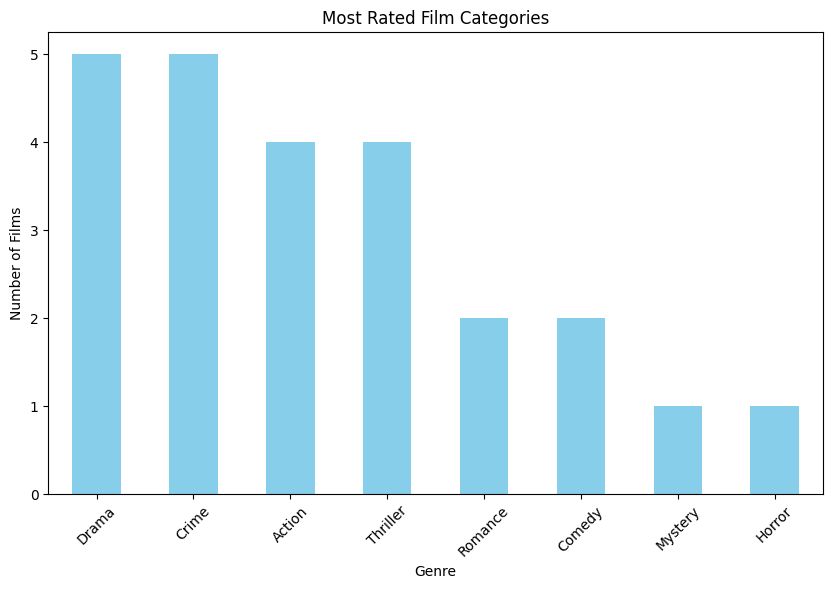

In [27]:
# Step 1: Find the films with the highest number of votes or ratings
most_rated_films = movie_data.nlargest(10, 'Votes')  # Assuming 'Votes' is the column representing the number of votes

# Step 2: Extract genres associated with the most rated films
most_rated_genres = most_rated_films['Genre'].str.split(',').explode().str.strip()

# Step 3: Count occurrences of each genre
genre_counts = most_rated_genres.value_counts()

# Step 4: Visualize the distribution of genres
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Number of Films')
plt.title('Most Rated Film Categories')
plt.xticks(rotation=45)
plt.show()


We see that the most rated film categories are 'Drama','Crime'and 'Action'

In [36]:
# The correlaton between numeric columns

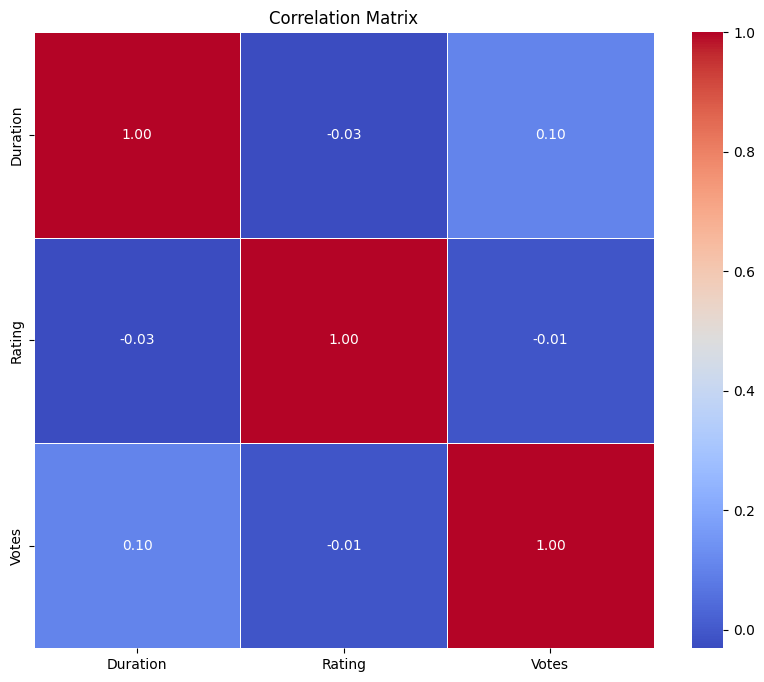

In [35]:
import seaborn as sns

# Exclude non-numeric columns from the correlation matrix
numeric_columns = movie_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = movie_data[numeric_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


### Data Preprocessing:

- **Handle missing values** 
- **Encode categorical variables**
- **Feature scaling**
- **Feature engineering** 

We will select data based on the rating column.

In [27]:
# Selecting rows where the 'Rating' column is not null
rated_movies = movie_data[movie_data['Rating'].notnull()]


In [28]:
rated_movies

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,(1992),NaN,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [29]:
rated_movies.isna().sum()

Name           0
Year           0
Duration    2068
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64

In [30]:
# Remove the 'Name' column
rated_movies = rated_movies.drop(columns=['Name'])
## Remove the 'Votes' column
#rated_movies = rated_movies.drop(columns=['Votes'])

In [31]:
rated_movies

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...
15501,(1992),NaN,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [32]:
rated_movies.isna().sum()

Year           0
Duration    2068
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64

In [33]:
# Define the list of columns from which to remove NaN values
columns_to_clean = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

# Remove rows with NaN values in the specified columns
movie_data_cleaned = rated_movies.dropna(subset=columns_to_clean)

# Print the shape of the cleaned DataFrame
print("Shape of cleaned DataFrame:", movie_data_cleaned.shape)


Shape of cleaned DataFrame: (7558, 9)


In [34]:
movie_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7558 entries, 1 to 15508
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      7558 non-null   object 
 1   Duration  5659 non-null   object 
 2   Genre     7558 non-null   object 
 3   Rating    7558 non-null   float64
 4   Votes     7558 non-null   object 
 5   Director  7558 non-null   object 
 6   Actor 1   7558 non-null   object 
 7   Actor 2   7558 non-null   object 
 8   Actor 3   7558 non-null   object 
dtypes: float64(1), object(8)
memory usage: 590.5+ KB


In [35]:
import pandas as pd
import re

# Assuming 'data' is your DataFrame
# Define a function to extract numeric values from a string
def extract_numeric(string):
    numbers = re.findall(r'\d+', str(string))  # Extract numeric values using regular expression
    return float(numbers[0]) if numbers else None  # Return the first numeric value found, or None if no numeric value is found

# Apply the function to extract numeric values and convert to float
movie_data_cleaned['Duration'] = movie_data_cleaned['Duration'].apply(extract_numeric)

# Calculate the mean of the non-NaN values in 'Duration' column
mean_duration = movie_data_cleaned['Duration'].mean(skipna=True)

# Replace NaN values in 'Duration' column with the mean
movie_data_cleaned['Duration'].fillna(mean_duration, inplace=True)

C:\Users\leila\AppData\Local\Temp\ipykernel_14668\3079974550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data_cleaned['Duration'] = movie_data_cleaned['Duration'].apply(extract_numeric)
C:\Users\leila\AppData\Local\Temp\ipykernel_14668\3079974550.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data_cleaned['Duration'].fillna(mean_duration, inplace=True)


In [19]:
movie_data_cleaned

,Year,Duration,Genre,Rating,Director,Actor 1,Actor 2,Actor 3
1,(2019),109.000000,Drama,7.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,(2019),110.000000,"Comedy, Romance",4.4,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,(1997),147.000000,"Comedy, Drama, Musical",4.7,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,(2005),142.000000,"Drama, Romance, War",7.4,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,(2012),82.000000,"Horror, Mystery, Thriller",5.6,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...
15501,(1992),133.439124,"Action, Crime, Drama",5.3,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,(1989),125.000000,"Action, Crime, Drama",5.8,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,(1988),133.439124,Action,4.6,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,(1999),129.000000,"Action, Drama",4.5,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


### Feature engineering 

In [29]:
# Classify actors and directors based on thier film count and rating

In [36]:
# Calculate the total number of films for each actor and director
actor_counts = movie_data_cleaned['Actor 1'].value_counts() + movie_data_cleaned['Actor 2'].value_counts() + movie_data_cleaned['Actor 3'].value_counts()
director_counts = movie_data_cleaned['Director'].value_counts()

# Calculate the average rating for each actor and director
actor_ratings = movie_data_cleaned.groupby(['Actor 1', 'Actor 2', 'Actor 3'])['Rating'].mean()
director_ratings = movie_data_cleaned.groupby('Director')['Rating'].mean()

# Determine thresholds for classifying actors and directors
film_count_thresholds = [actor_counts.quantile(q) for q in [0.33, 0.66]]
rating_thresholds = [actor_ratings.quantile(q) for q in [0.33, 0.66]]
director_film_count_thresholds = [director_counts.quantile(q) for q in [0.33, 0.66]]
director_rating_thresholds = [director_ratings.quantile(q) for q in [0.33, 0.66]]

def classify_actor(row, film_count_thresholds, rating_thresholds):
    actor_films = actor_counts.get(row['Actor 1'], 0) + actor_counts.get(row['Actor 2'], 0) + actor_counts.get(row['Actor 3'], 0)
    actor_rating = (actor_ratings.get(row['Actor 1'], 0) + actor_ratings.get(row['Actor 2'], 0) + actor_ratings.get(row['Actor 3'], 0)) / 3
    
    if (actor_films >= film_count_thresholds[1]).any() and (actor_rating >= rating_thresholds[1]).any():
        return 'High Rated'
    elif (actor_films >= film_count_thresholds[0]).any() and (actor_rating >= rating_thresholds[0]).any():
        return 'Medium Rated'
    else:
        return 'Low Rated'


def classify_director(row, director_film_count_thresholds, director_rating_thresholds):
    director_films = director_counts.get(row['Director'], 0)
    director_rating = director_ratings.get(row['Director'], 0)
    
    if director_films >= director_film_count_thresholds[1] and director_rating >= director_rating_thresholds[1]:
        return 'High Rated'
    elif director_films >= director_film_count_thresholds[0] and director_rating >= director_rating_thresholds[0]:
        return 'Medium Rated'
    else:
        return 'Low Rated'

# Classify actors and directors based on their film count and rating
movie_data_cleaned['Actor Category'] = movie_data_cleaned.apply(classify_actor, axis=1, args=(film_count_thresholds, rating_thresholds))
movie_data_cleaned['Director Category'] = movie_data_cleaned.apply(classify_director, axis=1, args=(director_film_count_thresholds, director_rating_thresholds))


C:\Users\leila\AppData\Local\Temp\ipykernel_14668\3006503547.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data_cleaned['Actor Category'] = movie_data_cleaned.apply(classify_actor, axis=1, args=(film_count_thresholds, rating_thresholds))
C:\Users\leila\AppData\Local\Temp\ipykernel_14668\3006503547.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data_cleaned['Director Category'] = movie_data_cleaned.apply(classify_director, axis=1, args=(director_film_count_thresholds, director_rating

In [37]:
movie_data_cleaned.isna().sum()

Year                 0
Duration             0
Genre                0
Rating               0
Votes                0
Director             0
Actor 1              0
Actor 2              0
Actor 3              0
Actor Category       0
Director Category    0
dtype: int64

Classify the film's category

In [38]:
# Step 1: Calculate average ratings for each genre
genre_ratings = movie_data_cleaned.groupby('Genre')['Rating'].mean()

# Step 2: Determine a threshold (e.g., the overall average rating)
threshold = movie_data_cleaned['Rating'].mean()

# Step 3: Create the new column
movie_data_cleaned['Rating Genre'] = movie_data_cleaned['Genre'].apply(
    lambda x: 'Higher Rating genre' if genre_ratings.get(x, 0) >= threshold else 'Lower Rating genre'
)


C:\Users\leila\AppData\Local\Temp\ipykernel_14668\1739265583.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data_cleaned['Rating Genre'] = movie_data_cleaned['Genre'].apply(


In [39]:
movie_data_cleaned.isna().sum()

Year                 0
Duration             0
Genre                0
Rating               0
Votes                0
Director             0
Actor 1              0
Actor 2              0
Actor 3              0
Actor Category       0
Director Category    0
Rating Genre         0
dtype: int64

Here's a breakdown of the columns we have added:

- Actor Category: Classifies actors into categories based on their average rating and the number of films they've contributed to.

- Director Category: Classifies directors into categories based on their average rating and the number of films they've directed.

- Rating Genre: Classifies genres into categories based on their tendency to have higher ratings.

In [40]:
movie_data_cleaned = movie_data_cleaned.drop(columns=['Genre','Director','Actor 1','Actor 2','Actor 3'])

In [41]:
movie_data_cleaned.isna().sum()

Year                 0
Duration             0
Rating               0
Votes                0
Actor Category       0
Director Category    0
Rating Genre         0
dtype: int64

In [130]:
# We will exctract the film age from the year of Release

In [42]:
import datetime

# Convert 'Year' column to datetime format
movie_data_cleaned['Year'] = pd.to_datetime(movie_data_cleaned['Year'].str.strip('()'), format='%Y')

# Get the current year
current_year = datetime.datetime.now().year

# Calculate the age of the film
movie_data_cleaned['Film Age'] = current_year - movie_data_cleaned['Year'].dt.year

# Drop the original 'Year' column if not needed anymore
movie_data_cleaned.drop(columns=['Year'], inplace=True)

In [43]:
movie_data_cleaned.isna().sum()

Duration             0
Rating               0
Votes                0
Actor Category       0
Director Category    0
Rating Genre         0
Film Age             0
dtype: int64

In [ ]:
# Encoding 

In [44]:
# Assuming 'Rating Genre' is a categorical feature in your DataFrame
movie_data_cleaned['Rating Genre'] = movie_data_cleaned['Rating Genre'].map({'Higher Rating genre': 1, 'Lower Rating genre': 0})

In [45]:
movie_data_cleaned['Actor Category'] = movie_data_cleaned['Actor Category'].map({'Low Rated': 0, 'Medium Rated': 1,'High Rated': 2})

In [46]:
movie_data_cleaned['Director Category'] = movie_data_cleaned['Director Category'].map({'Low Rated': 0, 'Medium Rated': 1,'High Rated': 2})

In [47]:
movie_data_cleaned.isna().sum()

Duration             0
Rating               0
Votes                0
Actor Category       0
Director Category    0
Rating Genre         0
Film Age             0
dtype: int64

In [48]:
# Remove commas and convert to numeric
movie_data_cleaned['Votes'] = movie_data_cleaned['Votes'].str.replace(',', '').astype(float)

# Normalize numerical features
scaler = MinMaxScaler()
movie_data_cleaned[['Duration', 'Film Age', 'Votes','Rating']] = scaler.fit_transform(movie_data_cleaned[['Duration', 'Film Age', 'Votes','Rating']])



In [50]:
movie_data_cleaned

,Duration,Rating,Votes,Actor Category,Director Category,Rating Genre,Film Age
1,0.293333,0.662921,0.000005,0,1,1,0.019231
3,0.296667,0.370787,0.000051,0,0,0,0.019231
5,0.420000,0.404494,0.001390,0,1,1,0.230769
6,0.403333,0.707865,0.001828,0,2,1,0.153846
8,0.203333,0.505618,0.000543,0,1,0,0.086538
...,...,...,...,...,...,...,...
15501,0.374797,0.471910,0.000220,0,1,0,0.278846
15503,0.346667,0.528090,0.000066,0,1,0,0.307692
15504,0.374797,0.393258,0.000010,0,0,0,0.317308
15505,0.360000,0.382022,0.001099,0,0,0,0.211538


### Model Selction

In [55]:
# Features (X) are all columns except the target variable
X = movie_data_cleaned.drop(columns=['Rating'])

# Target variable (y) is the column we want to predict
y = movie_data_cleaned['Rating']


In [56]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Initialize models
linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor()
random_forest_reg = RandomForestRegressor()

# Train models
linear_reg.fit(X_train, y_train)
decision_tree_reg.fit(X_train, y_train)
random_forest_reg.fit(X_train, y_train)

# Make predictions
linear_pred = linear_reg.predict(X_test)
dt_pred = decision_tree_reg.predict(X_test)
rf_pred = random_forest_reg.predict(X_test)

# Evaluate models
linear_mae = mean_absolute_error(y_test, linear_pred)
dt_mae = mean_absolute_error(y_test, dt_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)

# Print MAE for each model
print("Linear Regression MAE:", linear_mae)
print("Decision Tree Regression MAE:", dt_mae)
print("Random Forest Regression MAE:", rf_mae)
r1= r2_score(y_test, linear_pred)
r2 = r2_score(y_test, dt_pred)
r3 = r2_score(y_test, rf_pred)
print("Linear Regression R-squared (R2):", r1)
print("Decision Tree Regression R-squared (R2):", r2)
print("Random Forest Regression R-squared (R2):", r3)


Linear Regression MAE: 0.08937255739732733
Decision Tree Regression MAE: 0.11651222182589226
Random Forest Regression MAE: 0.08499166411936723
Linear Regression R-squared (R2): 0.42093971895633986
Decision Tree Regression R-squared (R2): 0.006662393446375092
Random Forest Regression R-squared (R2): 0.46525884909536297


In [59]:
# Support Vector Regression (SVR)
svr = SVR()
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)
svr_mae = mean_absolute_error(y_test, svr_pred)
svr_r2 = r2_score(y_test, svr_pred)
print("Support Vector Regression (SVR) MAE:", svr_mae)
print("Support Vector Regression (SVR) R-squared (R2):", svr_r2)

# Gradient Boosting Regression
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train, y_train)
gb_pred = gb_reg.predict(X_test)
gb_mae = mean_absolute_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)
print("Gradient Boosting Regression MAE:", gb_mae)
print("Gradient Boosting Regression R-squared (R2):", gb_r2)

# K-Nearest Neighbors (KNN) Regression
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)
knn_pred = knn_reg.predict(X_test)
knn_mae = mean_absolute_error(y_test, knn_pred)
knn_r2 = r2_score(y_test, knn_pred)
print("K-Nearest Neighbors (KNN) Regression MAE:", knn_mae)
print("K-Nearest Neighbors (KNN) Regression R-squared (R2):", knn_r2)

# Neural Network Regression
mlp_reg = MLPRegressor(max_iter=1000)
mlp_reg.fit(X_train, y_train)
mlp_pred = mlp_reg.predict(X_test)
mlp_mae = mean_absolute_error(y_test, mlp_pred)
mlp_r2 = r2_score(y_test, mlp_pred)
print("Neural Network Regression MAE:", mlp_mae)
print("Neural Network Regression R-squared (R2):", mlp_r2)
# Random Forest Regression
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
rf_pred = rf_reg.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print("Random Forest Regression MAE:", rf_mae)
print("Random Forest Regression R-squared (R2):", rf_r2)

# Gaussian Process Regression
gpr = GaussianProcessRegressor(kernel=RBF())
gpr.fit(X_train, y_train)
gpr_pred = gpr.predict(X_test)
gpr_mae = mean_absolute_error(y_test, gpr_pred)
gpr_r2 = r2_score(y_test, gpr_pred)
print("Gaussian Process Regression MAE:", gpr_mae)
print("Gaussian Process Regression R-squared (R2):", gpr_r2)




Support Vector Regression (SVR) MAE: 0.08599884459978993
Support Vector Regression (SVR) R-squared (R2): 0.4648208155063396
Gradient Boosting Regression MAE: 0.0790959271829837
Gradient Boosting Regression R-squared (R2): 0.529650075006339
K-Nearest Neighbors (KNN) Regression MAE: 0.09216009749717616
K-Nearest Neighbors (KNN) Regression R-squared (R2): 0.3954201799652598
Neural Network Regression MAE: 0.08640556834081886
Neural Network Regression R-squared (R2): 0.4469352013865078
Random Forest Regression MAE: 0.0849774484619823
Random Forest Regression R-squared (R2): 0.4639669933590801


C:\Users\leila\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Gaussian Process Regression MAE: 0.8033688633573104
Gaussian Process Regression R-squared (R2): -2619.770064369597


In [ ]:
# We will choose the Gradient Boosting Regression model

In [62]:
# Gradient Boosting Regression
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train, y_train)
gb_pred = gb_reg.predict(X_test)
gb_mae = mean_absolute_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)
print("Gradient Boosting Regression MAE:", gb_mae)
print("Gradient Boosting Regression R-squared (R2):", gb_r2)


Gradient Boosting Regression MAE: 0.07911683524584824
Gradient Boosting Regression R-squared (R2): 0.5292995840961963


In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming y_true are the actual target values and y_pred are the predicted values
mae = mean_absolute_error(y_test, gb_pred)
mse = mean_squared_error(y_test, gb_pred)
rmse = mean_squared_error(y_test, gb_pred, squared=False)
r2 = r2_score(y_test, gb_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


Mean Absolute Error (MAE): 0.07911683524584824
Mean Squared Error (MSE): 0.011010369014490208
Root Mean Squared Error (RMSE): 0.10493030551032533
R-squared (R2) Score: 0.5292995840961963


Overall, an R-squared score of 0.5293 suggests that our Gradient Boosting Regression model is performing reasonably well, explaining a significant portion of the variance in the target variable.





